# M5T02
---

# Ejercicio 1
- #### Divide el conjunto de datos adjuntos en train y test. Estudia los dos conjuntos por separado a nivel descriptivo.

In [1]:
import pandas as pd

housing_data = pd.read_csv('/Users/angel/Desktop/housing data.csv', header=None)
housing_data.index=housing_data.index + 1
housing_data.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", 
                  "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

housing_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


Conjunto de datos que proporciona información detallada sobre diversas características socioeconómicas y ambientales de los suburbios de Boston. Cada fila representa una ciudad o área y cada columna representa una característica específica.

A continuación compruebo si hay valores faltantes o lineas duplicadas.

In [2]:
housing_data[housing_data.duplicated()]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


In [3]:
housing_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

En nuestro enfoque de aprendizaje supervisado, empleamos el método train-test utilizando 'MEDV' como variable objetivo, la cual representa la media del valor de los inmuebles en el conjunto de datos.

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split

X = housing_data.drop('MEDV', axis=1)
y = housing_data['MEDV']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Divido el conjunto entre train y test para x y para y. En este caso x es todo el conjunto de datos excluyendo la variable objetivo, mientras que y es la propia variable objetivo 'MEDV'. Para el entrenamiento se ha destinado el 80% de los datos mientras que para testearlo se ha dejado el 20% restante.

Ahora paso a describir las características y la variable objetivo para train y para test.


El primer ejercicio te dice que estudies los dos conjuntos por separado a nivel descriptivo, debes describir qué tiene cada conjunto, algunas
gráficas para entender, algunos tests para demostrar.

In [5]:
print("Estadísticas descriptivas para características (X_train):")
print(x_train.describe())
print("\nEstadísticas descriptivas para características (X_test):")
print(x_test.describe())

print("\nEstadísticas descriptivas para variable objetivo (y_train):")
print(y_train.describe())
print("\nEstadísticas descriptivas para variable objetivo (y_test):")
print(y_test.describe())

Estadísticas descriptivas para características (X_train):
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean     3.609125   11.569307   10.985050    0.071782    0.556484    6.315891   
std      8.875058   23.152481    6.894618    0.258447    0.117704    0.709452   
min      0.009060    0.000000    0.740000    0.000000    0.385000    3.863000   
25%      0.081437    0.000000    5.130000    0.000000    0.452000    5.890500   
50%      0.261390    0.000000    8.560000    0.000000    0.538000    6.210000   
75%      3.202962   20.000000   18.100000    0.000000    0.631000    6.636750   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean    68.556436    3.808195    9.356436  404.032

Se puede observar que las muestras son bastante similares. Ahora voy a comparar train y test con dos mapas de calor para observar de una manera más visual las similitudes entre ambos conjuntos.

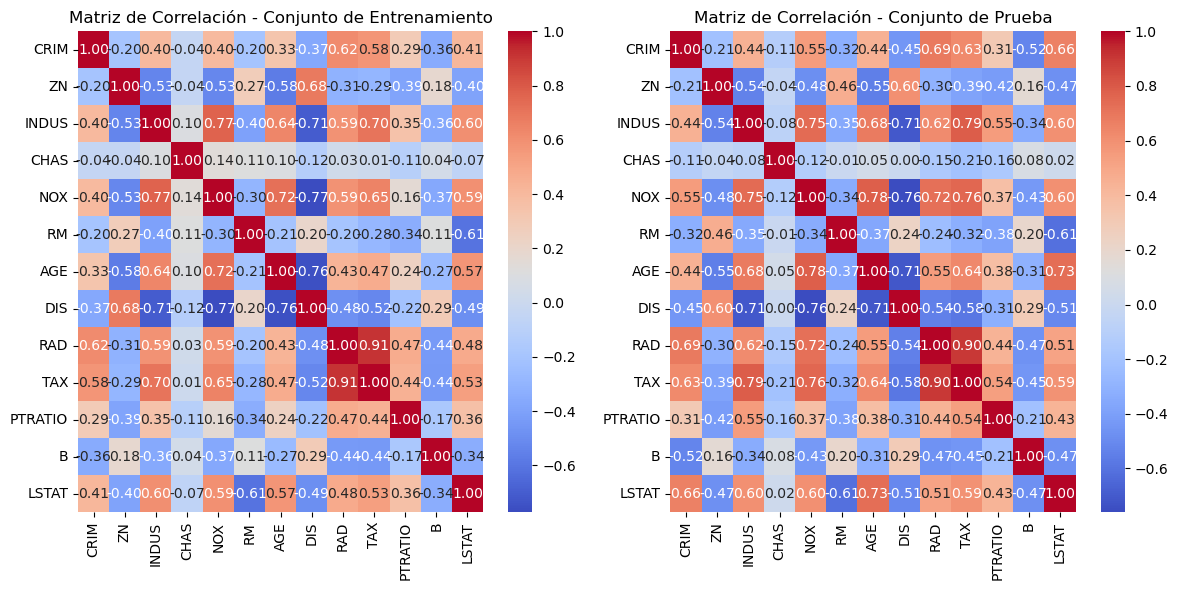

In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns

corr_train = x_train.corr()
corr_test = x_test.corr()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(corr_train, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0])
axes[0].set_title('Matriz de Correlación - Conjunto de Entrenamiento')

sns.heatmap(corr_test, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1])
axes[1].set_title('Matriz de Correlación - Conjunto de Prueba')
plt.title('Matriz de Correlación - Conjunto de Prueba')

plt.tight_layout()

Estos gráficos representan las matrices de correlación de ambos conjuntos. Nos ayuda a comprobar visualmente que los dos donjuntos son muy parecidos en general.

La última comprobacion la haré con la validación cruzada k-fold usando un modelo de regresión lineal. Utilizo este modelo ya que este método estadístico se utiliza para modelar la relación lineal entre una o más variables independientes y una variable dependiente, como es en este caso predecir el precio de la vivienda (MEDV).

In [7]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

modelo = LinearRegression()
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(modelo, X, y, cv=kfold, scoring='r2')

print("Puntajes de R^2 en cada pliegue:", r2_scores)
print("R^2 promedio:", r2_scores.mean())

Puntajes de R^2 en cada pliegue: [0.66875949 0.7342547  0.70986601 0.77595168 0.68727731]
R^2 promedio: 0.7152218388256876


He realizado una validación cruzada k-fold de cinco pliegues utilizando el coeficiente de determinación (R^2). El conjunto se ha separado en cinco subconjuntos aleatorios (pliegues) para entrenar y testear el modelo, proporcionando como resultado la media de todos ellos. R^2 nos sirve para evaluar el rendimiento del modelo en la predicción del precio de las viviendas. Un R^2 de 0 indica que el modelo no explica ninguna variabilidad en los datos, mientras que un R^2 de 1 indica un ajuste perfecto del modelo a los datos. En este caso, observamos que los resultados obtenidos en cada pliegue variaron entre aproximadamente 0.67 y 0.78, dando un R^2 promedio de aproximadamente 0.715. Esto significa que el modelo es capaz de explicar alrededor del 71.5% de la variabilidad en los datos, lo que sugiere que es un buen modelo para predecir el precio de las viviendas".

## Ejercicio 2

- #### Aplica algún proceso de transformación (estandarizar los datos numéricos, crear columnas dummy, polinomios...).

El siguiente gráfico muestra la comparación train/test para cada una de las características.

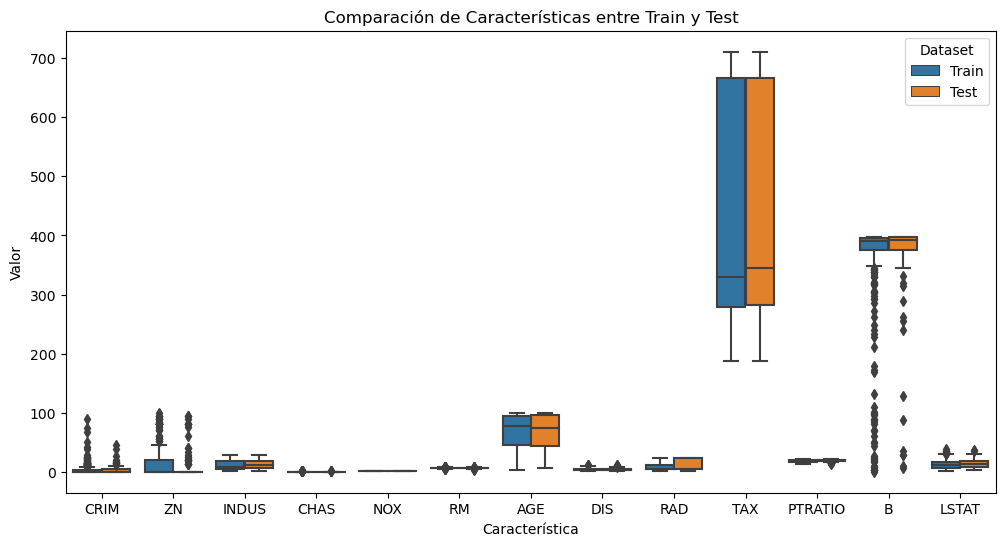

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
comparacion_caracteristicas = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", 
                  "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]

combined_data = pd.concat([x_train[comparacion_caracteristicas], x_test[comparacion_caracteristicas]], keys=['Train', 'Test'])
combined_data['Dataset'] = combined_data.index.get_level_values(0)
combined_data_melted = pd.melt(combined_data, id_vars='Dataset', value_vars=comparacion_caracteristicas)

plt.figure(figsize=(12, 6))
sns.boxplot(x='variable', y='value', hue='Dataset', data=combined_data_melted)
plt.title('Comparación de Características entre Train y Test')
plt.xlabel('Característica')
plt.ylabel('Valor');

Con este grágfico buscamos la similitud entre ambas versiones para así asegurar que el modelo se va a testear en un conjunto representativo del que se ha usado para entrenarlo. En general vemos mucha similitud aunque hay excepciones como ZN y RAD. ZN hace referencia a la proporción de zonas edificables mayores a 25.000 pies disponibles para cada entrada. Hay una gran cantidad de 0 que indica que no hay zonas disponibles y supongo que es por este motivo que se ha producido la diferencia. 

Por otro lado, y aunque similares entre train y test, la columna B tiene muchos outliers. Es la variable que indica la proporción de gente de raza negra en las diferentes ciudades o barrios. 

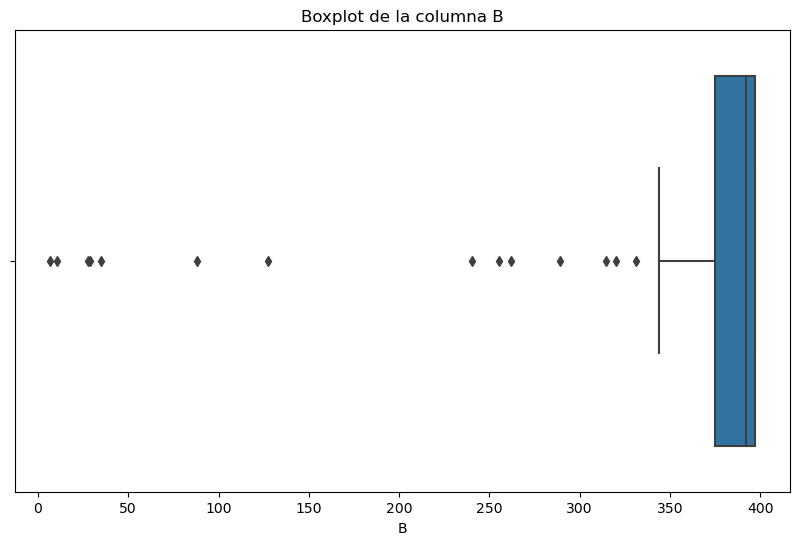

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=x_test['B'])
plt.title('Boxplot de la columna B')
plt.show()

La variable B parece mostrar que en muchas zonas de Boston hay muy poca gente de raza negra, mientras que hay mucha en muy pocas zonas.  

Ahora realizo el test Anderson Darling para comprobar la normalidad de las variables. He probado también el test Shapiro-Wilk pero mostraba una advertencia indicando que podría no ser del todo preciso al estar trabajando con una muestra de más de 5000 observaciones.

In [10]:
from scipy.stats import anderson

result_train = anderson(x_train.values.flatten())
result_test = anderson(x_test.values.flatten())

print("Resultados para x_train:")
print("Estadístico de prueba:", result_train.statistic)
print("Valores críticos:", result_train.critical_values)
print("Niveles de significancia correspondientes:", result_train.significance_level)
if result_train.statistic < result_train.critical_values[2]:
    print("Los datos en x_train pueden seguir una distribución normal (a un nivel de significancia del 5%)")
else:
    print("Los datos en x_train no siguen una distribución normal (a un nivel de significancia del 5%)")

print("\nResultados para x_test:")
print("Estadístico de prueba:", result_test.statistic)
print("Valores críticos:", result_test.critical_values)
print("Niveles de significancia correspondientes:", result_test.significance_level)
if result_test.statistic < result_test.critical_values[2]:
    print("Los datos en x_test pueden seguir una distribución normal (a un nivel de significancia del 5%)")
else:
    print("Los datos en x_test no siguen una distribución normal (a un nivel de significancia del 5%)")

Resultados para x_train:
Estadístico de prueba: 1084.88729925618
Valores críticos: [0.576 0.656 0.786 0.917 1.091]
Niveles de significancia correspondientes: [15.  10.   5.   2.5  1. ]
Los datos en x_train no siguen una distribución normal (a un nivel de significancia del 5%)

Resultados para x_test:
Estadístico de prueba: 274.08130621851365
Valores críticos: [0.574 0.654 0.785 0.915 1.089]
Niveles de significancia correspondientes: [15.  10.   5.   2.5  1. ]
Los datos en x_test no siguen una distribución normal (a un nivel de significancia del 5%)


El test rechaza la hipótesis de que los datos siguen una distribución normal con un nivel de significancia del 5%. Esto significa que el test asume un posible error de hasta el 5%. 

El test calcula un estadístico de prueba en base a los datos y lo compara con los valores críticos del propio test. Si el estadístico de prueba es mayor al valor crítico del nivel de significancia aplicado, se rechaza la hipótesis nula. En este caso, el estadístico es mucho mayor que cualquiera de los valores críticos con lo que se puede afirmar que los datos no siguen una distribución normal.

#### A continuación muestro las variables que presentan outliers.

In [11]:
Q1 = x_train.quantile(0.25)
Q3 = x_train.quantile(0.75)
IQR = Q3 - Q1

outliers = ((x_train < (Q1 - 1.5 * IQR)) | (x_train > (Q3 + 1.5 * IQR))).any(axis=0)

print("Variables con outliers en x_train:")
print(outliers[outliers == True])

Variables con outliers en x_train:
CRIM     True
ZN       True
CHAS     True
RM       True
DIS      True
B        True
LSTAT    True
dtype: bool


In [12]:
Q1 = x_test.quantile(0.25)
Q3 = x_test.quantile(0.75)
IQR = Q3 - Q1

outliers = ((x_test < (Q1 - 1.5 * IQR)) | (x_test > (Q3 + 1.5 * IQR))).any(axis=0)

print("Variables con outliers en x_test:")
print(outliers[outliers == True])

Variables con outliers en x_test:
CRIM       True
ZN         True
CHAS       True
RM         True
DIS        True
PTRATIO    True
B          True
LSTAT      True
dtype: bool


Estas siete variables presentan outliers tanto en test como en train, con lo que les aplicaré Robust Scaler como método de estandarización. Al resto se le aplicará Min Max Scaler al ser distribuciones no normales y sin outliers. 

Antes de estos procesos revisaré en detalle PTRATIO ya que vemos que tiene outliers en test pero no en train.

Empiezo con un boxplot comparando las versiones test y train.

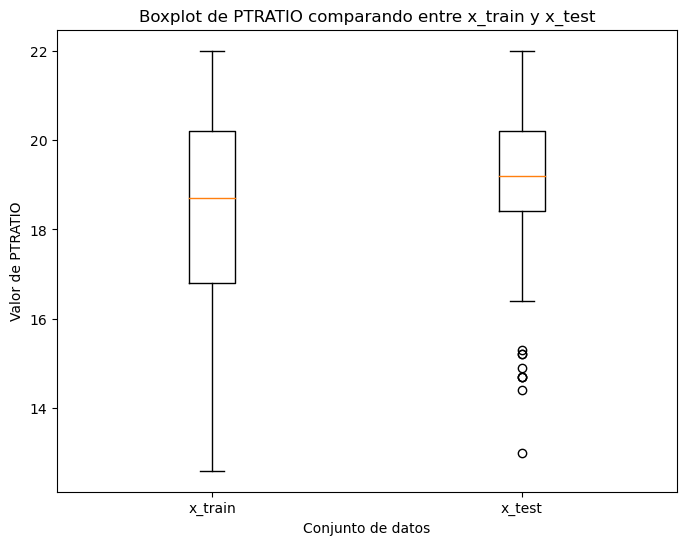

In [13]:
plt.figure(figsize=(8, 6))
plt.boxplot([x_train['PTRATIO'], x_test['PTRATIO']], labels=['x_train', 'x_test'])
plt.title('Boxplot de PTRATIO comparando entre x_train y x_test')
plt.ylabel('Valor de PTRATIO')
plt.xlabel('Conjunto de datos');

Se puede ver claramente la diferencia entre ambos gráficos y se comprueba la presencia de outliers en test pero no en train.

Sigo haciendo más comprobaciones descriptivas y gráficas.

In [14]:
x_train['PTRATIO'].describe()

count    404.000000
mean      18.318317
std        2.228701
min       12.600000
25%       16.800000
50%       18.700000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64

In [15]:
x_test['PTRATIO'].describe()

count    102.000000
mean      18.999020
std        1.800577
min       13.000000
25%       18.400000
50%       19.200000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64

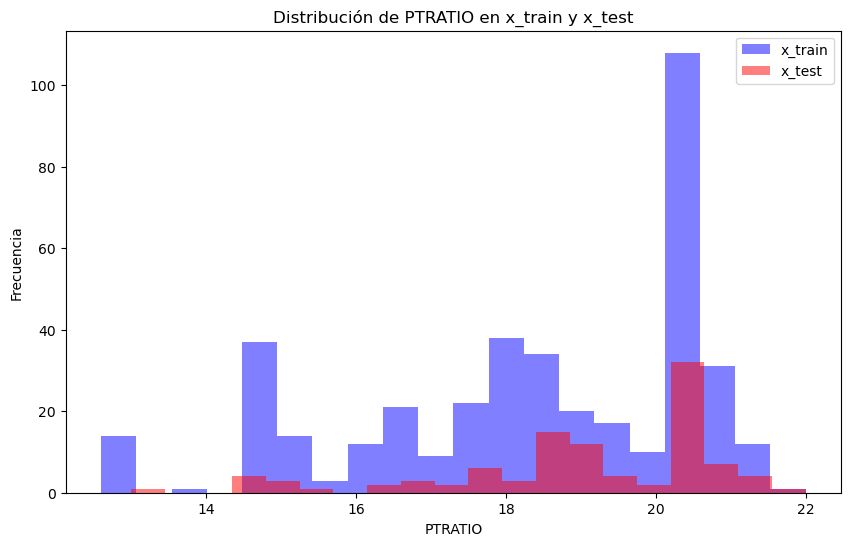

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(x_train['PTRATIO'], bins=20, alpha=0.5, label='x_train', color='blue')
plt.hist(x_test['PTRATIO'], bins=20, alpha=0.5, label='x_test', color='red')

plt.xlabel('PTRATIO')
plt.ylabel('Frecuencia')
plt.title('Distribución de PTRATIO en x_train y x_test')
plt.legend();

PTRATIO representa el ratio de alumnos por profesor en las diferentes zonas de la muestra. La descripción de la variable para train y test son bastante similares, en cambio podemos apreciar diferencias importantes en los gráficos. El boxplot nos muestra que la version test tiene muchos outliers y una caja pequeña, mientras que en train no hay ningún outlier y la caja es más grande. En el histograma también se ven diferencias en los valores más bajos que coincidirían con los outliers mostrados en el boxplot. Puede que al ser medidas más pequeñas y con un reparto del conjunto en 80/20, en la parte de test esos valores bajos sean tan bajos quen los considere valores atípicos. 

#### Ahora pasamos a los procesos de estandarización comenzando por las variables con outliers a las que se aplica RobustScaler.

In [17]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
x_train_scaled = scaler.fit_transform(x_train[['CRIM', 'ZN', 'CHAS', 'RM', 'DIS', 'B', 'LSTAT']])
x_test_scaled = scaler.transform(x_test[['CRIM', 'ZN', 'CHAS', 'RM', 'DIS', 'B', 'LSTAT']])

#### Acontinuación escalo las variables sin outliers con Min Max Scaler.

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_scaled_mm = scaler.fit_transform(x_train[['INDUS', 'NOX', 'AGE', 'RAD', 'TAX', 'PTRATIO']])
x_test_scaled_mm = scaler.transform(x_test[['INDUS', 'NOX', 'AGE', 'RAD', 'TAX', 'PTRATIO']])

### Expansión Polinómica

In [19]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

poly = PolynomialFeatures(degree=4)
x_train_poly = poly.fit_transform(x_train_scaled)
x_test_poly = poly.transform(x_test_scaled)

x_train_combined = np.concatenate([x_train_scaled, x_train_poly], axis=1)
x_test_combined = np.concatenate([x_test_scaled, x_test_poly], axis=1)

x_train_poly_mm = poly.fit_transform(x_train_scaled_mm)
x_test_poly_mm = poly.transform(x_test_scaled_mm)

x_train_combined_mm = np.concatenate([x_train_scaled_mm, x_train_poly_mm], axis=1)
x_test_combined_mm = np.concatenate([x_test_scaled_mm, x_test_poly_mm], axis=1)

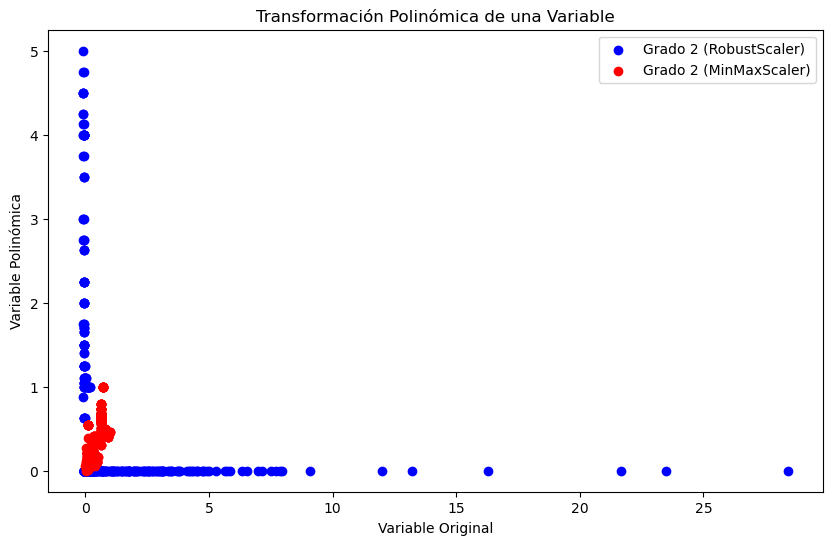

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(x_train_scaled[:, 0], x_train_poly[:, 2], color='blue', label='Grado 2 (RobustScaler)')
plt.scatter(x_train_scaled_mm[:, 0], x_train_poly_mm[:, 2], color='red', label='Grado 2 (MinMaxScaler)')
plt.xlabel('Variable Original')
plt.ylabel('Variable Polinómica')
plt.title('Transformación Polinómica de una Variable')
plt.legend(); 

He ido cambiando variables pero no consigo ver diferencias al cambiar el rango. Creo que el paso anterior no es correcto, aunque con lo que he ido viendo me parece que está bien. En este caso no tengo interpretación para este gráfico.

### Columnas Dummy

In [25]:
from sklearn.preprocessing import OneHotEncoder

rad_index = housing_data.columns.get_loc('RAD')

def encode_and_concatenate(data, rad_index):
    encoder = OneHotEncoder(categories='auto', sparse=False)
    encoded_data = encoder.fit_transform(data[:, [rad_index]])
    data = np.delete(data, rad_index, axis=1)
    return np.concatenate((data, encoded_data), axis=1)

x_train_poly = encode_and_concatenate(x_train_poly, rad_index)
x_train_poly_mm = encode_and_concatenate(x_train_poly_mm, rad_index)
x_test_poly = encode_and_concatenate(x_test_poly, rad_index)
x_test_poly_mm = encode_and_concatenate(x_test_poly_mm, rad_index)

KeyError: 'RAD'

No entiendo donde he eliminado la columna RAD o por qué no la encuentra. Los subconjuntos se han dividido en matrices en lugar de dataframes pero he visto que eso es lo correcto para conjuntos con muchos datos con la finalidad de entrenar modelos. 

In [21]:
rad_dummies = pd.get_dummies(housing_data['RAD'], prefix='RAD', drop_first=True)
housing_data = pd.concat([housing_data, rad_dummies], axis=1)
housing_data = housing_data.drop(['RAD'], axis=1)

housing_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,LSTAT,MEDV,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296.0,15.3,...,4.98,24.0,0,0,0,0,0,0,0,0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242.0,17.8,...,9.14,21.6,1,0,0,0,0,0,0,0
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242.0,17.8,...,4.03,34.7,1,0,0,0,0,0,0,0
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222.0,18.7,...,2.94,33.4,0,1,0,0,0,0,0,0
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222.0,18.7,...,5.33,36.2,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,273.0,21.0,...,9.67,22.4,0,0,0,0,0,0,0,0
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,273.0,21.0,...,9.08,20.6,0,0,0,0,0,0,0,0
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,273.0,21.0,...,5.64,23.9,0,0,0,0,0,0,0,0
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,273.0,21.0,...,6.48,22.0,0,0,0,0,0,0,0,0


# Exercici 3
- #### Resumeix les noves columnes generades de manera estadística i gràfica

